In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def gen_data(n):
    x = np.random.uniform(low=0, high=10, size=n)
    y = np.random.uniform(low=0, high=10, size=n)
    data = np.column_stack((x, y))
    
    return data

data = gen_data(100)

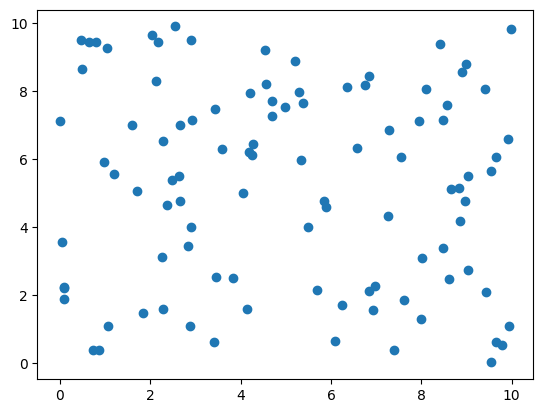

In [14]:
plt.scatter(x = data[:,0], y = data[:,1], )

In order to compute the k-means clustering algorithm we need to:
1. Scale the dataset
2. Randomly generate centroids
3. Assign each point to a centroid based on the distance from centroids
4. Compute the geometric mean and update the centroids
5. Iterate step 3-4 until the setup does not change or we hit our max iteration limit

### 1. Scale the dataset

In [15]:
def scale_data(data):
    cols = data.shape[1]
    for col in range(cols):
        col_min = data[:, col].min()
        col_max = data[:, col].max()
        data[:, col] = ((data[:, col] - col_min) / (col_max - col_min))
    return 

### 2. Initialise random centroids



In [16]:
ran_idx = np.random.choice(data.shape[0])
centroid = data[ran_idx]
centroid

array([0.97653162, 5.89379025])

In [17]:
def ran_centroids(data, k):
    centroids = []

    for _ in range(k):
        ran_idx = np.random.choice(data.shape[0])
        centroid = data[ran_idx]
        centroids.append(centroid)

    return np.array(centroids)

centroids = ran_centroids(data, 5)

### 3.1 Compute Euclidean Distance

In [18]:
def euclidean_distance (centroid, point):
    return np.sqrt(np.sum((centroid - point)**2))

### 3.2 Compute individual point closest centroid idx

In [19]:
def closest_centroid_idx(centroids, x):
    k = centroids.shape[0]
    distances = np.empty(k)
    for i in range(k):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances)

### 3.3 Compute closest centroid column

In [20]:
def assign_centroids(data, centroids):
    n, _ = data.shape
    cluster_idx = np.empty(n)
    for i in range(n):
        cluster_idx[i] = closest_centroid_idx(centroids, data[i])
    return cluster_idx

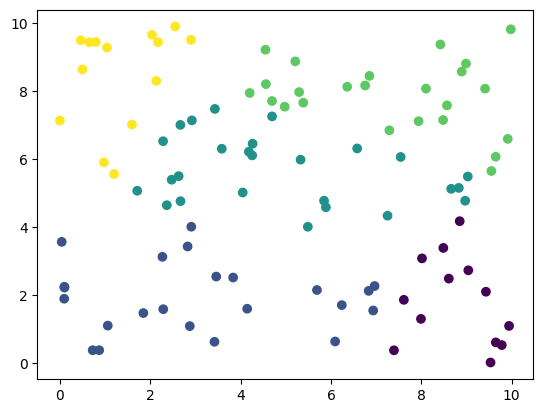

In [21]:

cluster_idx = assign_centroids(data=data,centroids=centroids)

plt.scatter(x = data[:,0], y = data[:,1], c=cluster_idx)


### 4. Compute mean and update centroids

In [22]:
def update_centroids(cluster_idx, data, k):
    _, d = np.shape(data)
    new_centroids = np.empty((k, d))
    
    for i in range(k):
        points = data[cluster_idx == i]
        if len(points) == 0:
            ran_idx = np.random.choice(data.shape[0])
            new_centroids[i] = data[ran_idx]
        else:
            new_centroids[i] = np.mean(points, axis=0)

    return new_centroids

new_centroids = update_centroids(cluster_idx=cluster_idx, data=data, k=3)

new_centroids

array([[8.794384  , 1.81671406],
       [3.11525635, 1.91271275],
       [4.90820409, 5.66376963]])

### EXTRA: Plotting function with PCA
The code above can run entirely on NumPy and would be able to do K-means clustering even for features >2. But for visualisation purposes I will import ```sklearn``` in order to condense the dataset into 2 PC and visualise the dynamic clustering

In [34]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

def plot_clusters(data, cluster_idx, centroids, iteration, speed=1):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids)
    
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1],c=cluster_idx)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], s=200, marker='X', c='red')
    plt.show()
    plt.pause(speed)

### 5. Final K-means algorithm 

In [38]:
def k_means_clustering(max_iteration=100, k=3, n=100, data='r', features=[], speed=1):
    if data == 'r':
        data = gen_data(n)
    else:
        raw = np.genfromtxt(
            data,
            delimiter=',',
            names=True,
            usecols=features,
            dtype=float
            )
        data = np.column_stack([raw[f] for f in features])
        data = data[~np.isnan(data).any(axis=1)]
        
    scale_data(data)

    centroids = ran_centroids(data, k)
    old_centroids = np.empty_like(centroids)
    iteration = 1

    while iteration <= max_iteration and not np.allclose(centroids, old_centroids):
        old_centroids = centroids.copy()

        cluster_idx = assign_centroids(data, centroids)
        centroids = update_centroids(cluster_idx, data, k)
        plot_clusters(data, cluster_idx, centroids, iteration, speed)
        iteration+=1

    # Print finals centroids values

    print('\nFinal centroids (original features):\n')
    
    for i, c in enumerate(centroids):
        print(f'Cluster {i}')
        for name, value in zip(features, c):
            print(f' {name}: {value:.4f}')
        print()

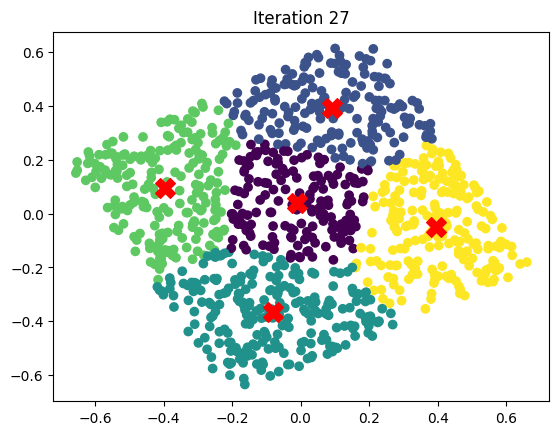

In [27]:
k_means_clustering(k=5, n=1000)

### 6. Example with features > 2

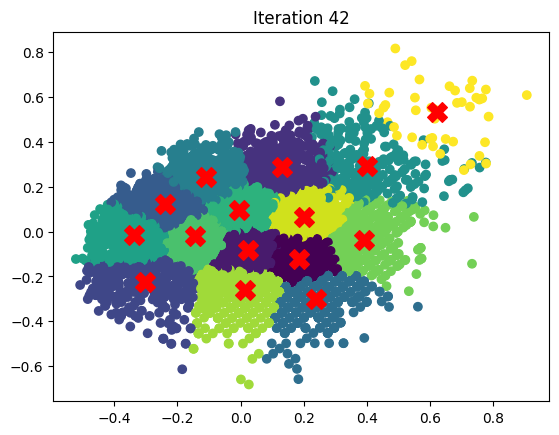


Final centroids (original features):

Cluster 0
 overall: 0.4845
 potential: 0.4521
 wage_eur: 0.0193
 value_eur: 0.0077
 age: 0.5363

Cluster 1
 overall: 0.4062
 potential: 0.4154
 wage_eur: 0.0091
 value_eur: 0.0061
 age: 0.3902

Cluster 2
 overall: 0.5875
 potential: 0.7178
 wage_eur: 0.0639
 value_eur: 0.0563
 age: 0.2421

Cluster 3
 overall: 0.1238
 potential: 0.2273
 wage_eur: 0.0022
 value_eur: 0.0010
 age: 0.2610

Cluster 4
 overall: 0.2496
 potential: 0.5394
 wage_eur: 0.0028
 value_eur: 0.0036
 age: 0.1150

Cluster 5
 overall: 0.4172
 potential: 0.3812
 wage_eur: 0.0069
 value_eur: 0.0018
 age: 0.7117

Cluster 6
 overall: 0.3823
 potential: 0.6625
 wage_eur: 0.0099
 value_eur: 0.0111
 age: 0.1289

Cluster 7
 overall: 0.7438
 potential: 0.7616
 wage_eur: 0.1946
 value_eur: 0.1752
 age: 0.4241

Cluster 8
 overall: 0.1451
 potential: 0.4025
 wage_eur: 0.0014
 value_eur: 0.0016
 age: 0.1254

Cluster 9
 overall: 0.4394
 potential: 0.5504
 wage_eur: 0.0139
 value_eur: 0.0120
 age:

In [39]:
path = '/home/viklin/repos/ai_and_text_analytics/worksheets/04_kmeans_exercise/players_22.csv'

features = ['overall', 'potential', 'wage_eur', 'value_eur', 'age']

k_means_clustering(max_iteration=100, k=15, data=path,features=features, speed=0.2)